In [1]:
# Importing the libraries
# !pip install matplotlib
# !pip install seaborn

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
columns = ['Sepal Length','Sepal Width', 'Petal length', 'Petal width', 'Class_labels']
# Providing title for the values

In [3]:
df = pd.read_csv('iris.data', names=columns)
df

,Sepal Length,Sepal Width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Some basic statistical analysis about the data

df.describe()

,Sepal Length,Sepal Width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


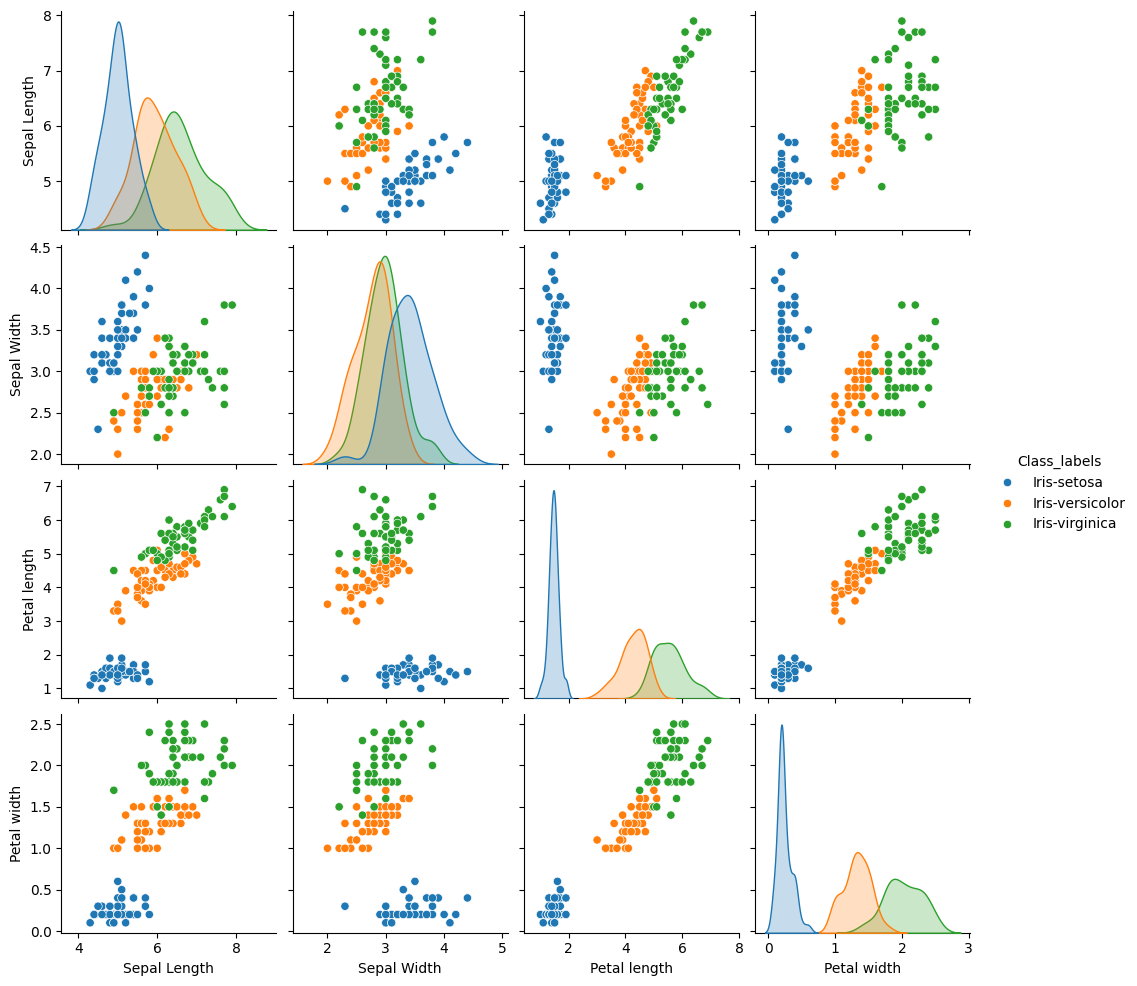

In [7]:
# Visulaising the data
sns.pairplot(df, hue= 'Class_labels')

In [9]:
# Seperate features and target

data = df.values

# print(df.values)
# [[5.1 3.5 1.4 0.2 'Iris-setosa']
#  [4.9 3.0 1.4 0.2 'Iris-setosa'] .....

X = data[:,0:4]
Y = data[:,4]

In [17]:
# Calculate avarage of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1]) for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

# 4 rows correspond to the 4 features (e.g., sepal_length, sepal_width, etc.).
# 3 columns correspond to the 3 unique classes (e.g., Setosa, Versicolor, Virginica).
print(Y_Data_reshaped)

[[5.006     3.418     1.4640001 0.244    ]
 [5.9360003 2.7700002 4.26      1.3260001]
 [6.5880003 2.974     5.552     2.026    ]]


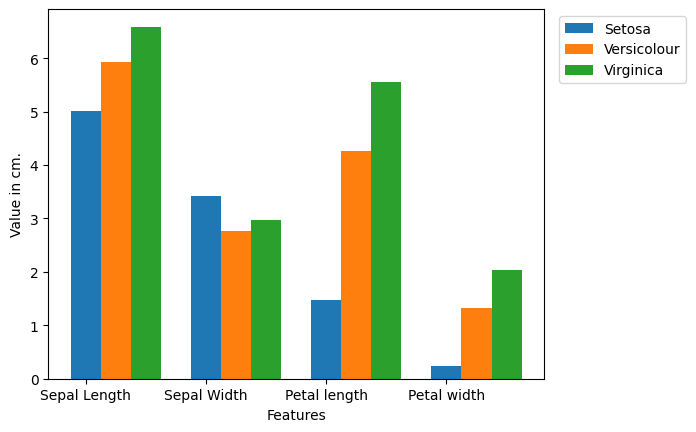

In [19]:
# Plot the avarage
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()


# Plot the graph using the average value of 3 flowers

SUPPORT VECTOR CLASSIFICATION - SVM model 

In [28]:
# splitting the train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

print(X_train, X_test, y_train, y_test )

[[5.1 3.4 1.5 0.2]
 [5.8 2.7 4.1 1.0]
 [6.9 3.1 5.4 2.1]
 [5.7 3.0 4.2 1.2]
 [6.8 2.8 4.8 1.4]
 [5.0 3.0 1.6 0.2]
 [5.9 3.0 5.1 1.8]
 [6.3 3.3 4.7 1.6]
 [7.0 3.2 4.7 1.4]
 [5.4 3.4 1.7 0.2]
 [5.1 3.8 1.5 0.3]
 [5.0 3.5 1.3 0.3]
 [7.6 3.0 6.6 2.1]
 [6.7 3.1 5.6 2.4]
 [6.2 2.2 4.5 1.5]
 [7.7 3.0 6.1 2.3]
 [4.9 3.1 1.5 0.1]
 [6.0 2.7 5.1 1.6]
 [5.8 2.8 5.1 2.4]
 [4.9 3.0 1.4 0.2]
 [6.3 2.9 5.6 1.8]
 [4.8 3.0 1.4 0.3]
 [5.6 2.7 4.2 1.3]
 [7.2 3.0 5.8 1.6]
 [5.4 3.0 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.1 3.5 1.4 0.2]
 [5.0 3.5 1.6 0.6]
 [6.0 3.4 4.5 1.6]
 [5.0 3.6 1.4 0.2]
 [7.9 3.8 6.4 2.0]
 [5.7 2.6 3.5 1.0]
 [5.7 2.8 4.5 1.3]
 [6.4 2.9 4.3 1.3]
 [5.0 2.0 3.5 1.0]
 [6.5 2.8 4.6 1.5]
 [5.7 4.4 1.5 0.4]
 [5.8 4.0 1.2 0.2]
 [5.6 2.9 3.6 1.3]
 [6.7 3.3 5.7 2.1]
 [4.4 2.9 1.4 0.2]
 [6.5 3.0 5.2 2.0]
 [5.8 2.7 3.9 1.2]
 [4.8 3.4 1.9 0.2]
 [5.2 2.7 3.9 1.4]
 [6.7 3.1 4.7 1.5]
 [6.3 2.5 5.0 1.9]
 [4.8 3.0 1.4 0.1]
 [6.3 2.5 4.9 1.5]
 [6.7 3.0 5.0 1.7]
 [6.8 3.2 5.9 2.3]
 [6.5 3.2 5.1 2.0]
 [5.6 3.0 4.

In [23]:
# Support vector classification model training
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [24]:
# Predicting the test data using the model trained by train data

prediction = svn.predict(X_test)

In [27]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.9666666666666667

In [30]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       0.30      0.23      0.26        13
Iris-versicolor       0.17      0.29      0.21         7
 Iris-virginica       0.38      0.30      0.33        10

       accuracy                           0.27        30
      macro avg       0.28      0.27      0.27        30
   weighted avg       0.29      0.27      0.27        30



In [32]:
# Predict the 3 species of a flower by the user input vector

X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
